# Sistemas Lineales - Fourier<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Filtrado en el dominio de la frecuencia

Fourier: "*Cualquier función periódica puede ser expresada como la sumatoria de senos y/o cosenos de diferentes frecuencias, cada una multiplicada por un coeficiente distinto*" (**Series de Fourier**)

![fourier](Fourier.PNG)

Incluso si las funciones no son periódicas (pero que su área bajo la curva es finita) pueden ser expresadas como la integral de senos y/o cosenos multiplicada por una función de pesos (Esto es la **Transformada de Fourier**). Ambas representaciones permiten recuperar la función original bajo el proceso inverso, sin perdida de información, por lo tanto es posible trabajar en el *dominio de Fourier* para después regresar al dominio espacial.

## La transformada discreta de Fourier y su inversa (2D)

La *transformada discreta de fourier* (DFT) en 2D, se encuentra de la forma:
### $$F(u, v) = \sum^{M-1}_{x=0}\sum^{N-1}_{y=0}f(x, y)e^{-j2\pi(ux/M + vy/N)}$$

En donde $f(x,y)$ es una imagen digital de tamaño $M\times N$ que será evaluada por los valores de las variables discretas $u$ y $v$ en los rangos de $u = 0, 1, 2, ..., M-1$ y $v=0, 1, 2, ..., N-1$.

Dada la transformada $F(u, v)$, podemos obtener $f(x, y)$ al usar la *transformada inversa discreta de Fourier* (IDFT):
### $$f(x, y) = \frac{1}{MN}\sum^{M-1}_{u=0}\sum^{N-1}_{v=0}F(u, v)e^{j2\pi(ux/M + vy/N)}$$

## Espectro de Fourier y el ángulo de fase

Debido a que la 2D DFT es compleja, puede ser expresada de manera polar:
$$F(u, v) = \|{F(u, v)\|}e^{j\phi(u, v)}$$

Donde la magnitud:
$$\|F(u, v)\|=[R^2(u, v) + I^2(u, v)]$$

Es llamado el espectro (o frecuencia) de Fourier, y:
$$\phi(u, v) = arctan[\frac{I(u, v)}{R(u, v)}]$$

es el ángulo de fase. 

La transformada de Fourier de una función real tiene su conjugada simétrica, lo que implica que el espectro tiene una simetría par en el origen:
$$\|F(u, v)\| = \|F(-u, -v)\|$$
El ángulo de fase exhibe la siguiente simetría impar en el origen:
$$\phi(u, v) = -\phi(-u, -v)$$
 
Tenemos que:
$$F(0, 0) = \sum^{M-1}_{x=0}\sum^{N-1}_{y=0}f(x, y)$$

Lo que indica que el término de frecuencia cero es proporcional al valor promedio de $f(x, y)$, esto es:
$$F(0, 0) = MN\frac{1}{MN}\sum^{M-1}_{x=0}\sum^{N-1}_{y=0}f(x, y)$$
$$= MN\|\overline f(x, y)\|$$

En donde $\overline f$ denota el valor promedio de $f$, entonces:
$$\|F(0, 0)\| = MN\|\overline f(x, y)\|$$

Dado que la constante de proporcionalidad $MN$ usualmente es grande, $\|F(0, 0)\|$ es normalmente el componente más grande del espectro por un factor que puede ser mayor (por varios ordenes de magnitud) que los otros términos, por eso normalmente es llamado el *componente dc*

En la siguiente imagen se muestra el proceso para mostrar el espectro en frecuencia de manera adecuada.
![fourier show](DFTshow.PNG)

En donde en la imagen superior izquierda se muestra la imagen de entrada, la superior derecha muestra el espectro de Fourier $[0, 255]$, podemos observar que los origenes espacial y frecuencial en ambos dominios se encuentra en la esquina superior izquierda, como era de esperarse, el área alrededor del origen de la transformada coontiene los valores más altos (reflejado en una mayor intensidad), sin embargo, note que las 4 esquinas del espectro contienen brillos similares, esto es debido a la propiedad de periodicidad, para centrar el espectro, solamente multiplicamos por $(-1)^{x+y}$ antes de calcular la DFT, obteniendo el resultado de la imagen en la esquina inferior izquierda, siendo más sencilla de visualizar (note la simetría en el punto central). Ya que el término de dc es mucho mayor que los demás valores, las otras intensidades quedan comprimidas, para mostrar una mejor imagen se aplica la transformada logaritmo $log\|1 + F(u, v)\|$ como se muestra en la última imagen.

Las componentes del espectro de la DFT determinan las amplitudes de las senoidales que se combinan para mostrar la imagen resultante. A cualquier frecuencia dada en la DFT de una imagen, una gran amplitud implica una gran prominencia de una sinusoidal de esa frencuencia en la imagen, por otro lado, una amplitud pequeña implica que menos de esa sinusoidal está presente.

























# Fundamentos del filtrado en el dominio de la frecuencia

El filtrar en el dominio de la frecuencia consiste en modificar la transformada de Fourier de una imagen para después modificar la transformada inversa para obtener el resultado procesado. Por lo tanto, dada una imagen $f(x, y)$ de tamaño $M \times N$, la ecuación básica para el filtrado se encuentra de la forma:
$$g(x, y) = \mathfrak{F}^{-1}[H(u, v)F(u, v)]$$
En donde $\mathfrak{F}^{-1}$ es la IDFT, $F(u, v)$ es la DFT de la imagen de entrada $f(x, y)$, $H(u, v)$ es el filtro, y $g(x, y)$ es la imagen filtrada. 

Uno de los filtros más sencillos que podemos construir es un filtro $H(u, v)$ que es $0$ en el centro de la transformada y $1$ en lo demás, el objetivo es que este filtro rechace el término dc y "deje pasar" todos los otros términos de $F(u, v)$, al realizar el producto $H(u, v)F(u, v)$. Sabemos que el término de dc es el responsable de la intensidad promedio de la imagen, así que al ponerla en cero reduciremos la intensidad promedio de la imagen a cero. 















In [1]:
#cargamos las librerías de para manipular, mostrar y cargar imagenes.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def rgb2gray(image):
    """función para convertir una imagen de 3 canales (rgb) a escala de grises (1 canal)"""
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

def showImage(image, title):
    """función para mostrar las imágenes"""
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

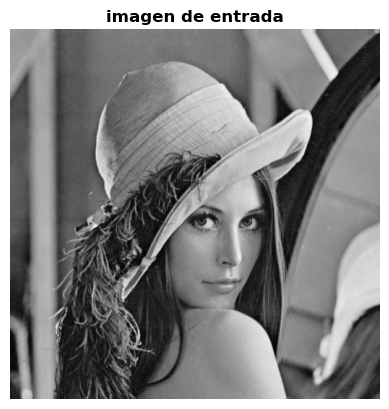

In [3]:
f = mpimg.imread('Lenna.png')
f = rgb2gray(f)

showImage(f, 'imagen de entrada')

Ahora procederemos a obtener la transformada de Fourier

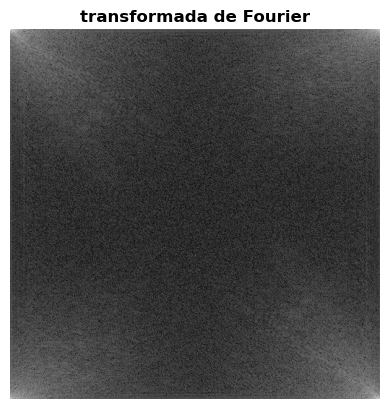

In [4]:
fourier = np.fft.fft2(f)

#solo vamos a mostrar la parte real de la DFT, además, aplicaremos la transformación logaritmo 
showImage(np.abs(np.log(1 + fourier)), 'transformada de Fourier')

Ahora procederemos a poner los términos de las esquinas (frecuencias más altas) al centro

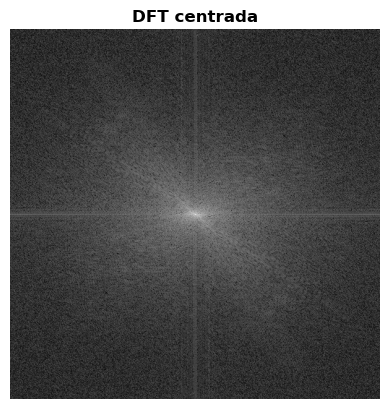

In [5]:
fourier = np.fft.fftshift(fourier)
9
showImage(np.abs(np.log(1 + fourier)), 'DFT centrada')

Se genera el filtro para eliminar el componente de $dc$ ($F(0, 0)$), el cual consistirá en todos los elementos valdrán 1 excepto el del centro que valdrá 0.

In [6]:
filtro_dc = np.ones(fourier.shape) #matriz del mismo tamaño que la imagen, donde todos los elementos son 1
filtro_dc[fourier.shape[0]//2, fourier.shape[1]//2] = 0 #el elemento central es 0

Se procede a la multiplicación de la DFT con este filtro

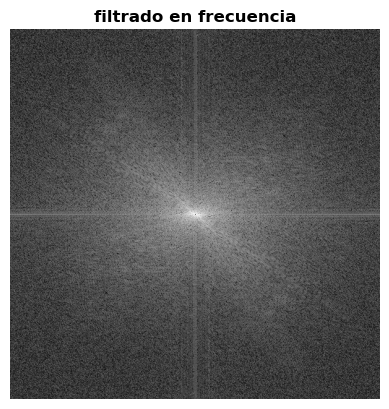

In [7]:
filtrado_dc = fourier*filtro_dc
showImage(np.abs(np.log(1 + filtrado_dc)), 'filtrado en frecuencia')

Una vez filtrada, regresamos a la imagen en el dominio espacial.

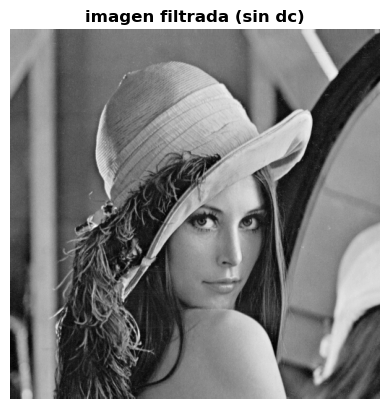

In [12]:
g_fourier_dc = np.fft.ifftshift(filtrado_dc)
g_fourier_dc = np.fft.ifft2(g_fourier_dc)
g_fourier_dc = np.real(g_fourier_dc)

showImage(g_fourier_dc, 'imagen filtrada (sin dc)')

Ahora veremos como la media de la imagen se aproxima a 0, debido a que utilizamos un filtro que elimina el elemento dc

### "Frecuencias bajas están asociadas a variaciones muy bajas de intensidad de los componentes de la imagen. Por otro lado, las altas frecuencias son causadas por transiciones abruptas en intensidad, como lo son los bordes y el ruido "

Por ello, podemos esperar crear filtros **_pasabajas_** que atenúe las altas frecuencias y a su vez no afectar a las bajas frecuencias, lo que hará un efecto de _difuminado_ en la imagen. El filtro con el efecto contrario es el filtro **_pasaaltas_**, el cual mejorará los detalles bien definidos en la imagen, pero causará una reducción en el contraste de esta.






In [13]:
print("media de f: ", np.mean(f), "media de g:", np.mean(g_fourier_dc))

media de f:  0.4863870083715969 media de g: -3.686287386450715e-18


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).
